In [1]:
%matplotlib inline

In [2]:
import numpy as np
from astropy import units as u
from astropy import stats

In [3]:
import pylab as pl
pl.rcParams['figure.figsize'] = (20,8)

In [4]:
import sys
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show
from spectral_cube import SpectralCube
import warnings
import spectral_cube
warnings.filterwarnings(action='ignore', category=spectral_cube.utils.StokesWarning)
warnings.filterwarnings(action='ignore', category=spectral_cube.utils.BeamWarning)

In [5]:
import os
os.chdir("/lustre/lard/projects/ALMA_IMF/2017.1.01355.L/imaging_results")

In [6]:
ls -lhrtd W51-E_B6_clean_mask.mask

drwxr-xr-x 3 aginsbur observer 4.0K Mar 14 15:13 W51-E_B6_clean_mask.mask/


Text(0.5, 1.0, 'Custom Mask')

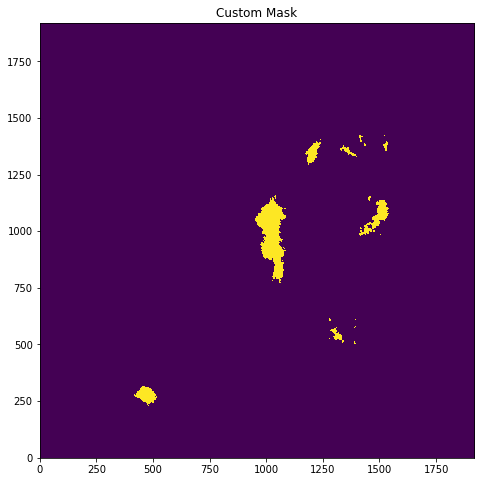

In [7]:
mask = SpectralCube.read('W51-E_B6_clean_mask.mask', format='casa_image')[0]
pl.imshow(mask.value, origin='lower', interpolation='none')
pl.title("Custom Mask")

In [8]:
ls -d W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0*.image.tt0

W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_dirty.image.tt0/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0.image.tt0/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal1.image.tt0/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal2.image.tt0/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal3.image.tt0/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal4.image.tt0/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal5.image.tt0/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal6.image.tt0/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal7.image.tt0/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_toodeep.image.tt0/


In [9]:
imgs_dirty_b6, cubes_dirty_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_dirty')

In [62]:
imgs_before_b6, cubes_before_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0')

In [11]:
imgs_after_b6, cubes_after_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal1')

In [12]:
imgs_after2_b6, cubes_after2_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal2')

In [13]:
imgs_after3_b6, cubes_after3_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal3')

In [14]:
imgs_after4_b6, cubes_after4_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal4')

In [15]:
imgs_after5_b6, cubes_after5_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal5')

In [16]:
imgs_after6_b6, cubes_after6_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal6')

In the images below, the white contours show the mask.

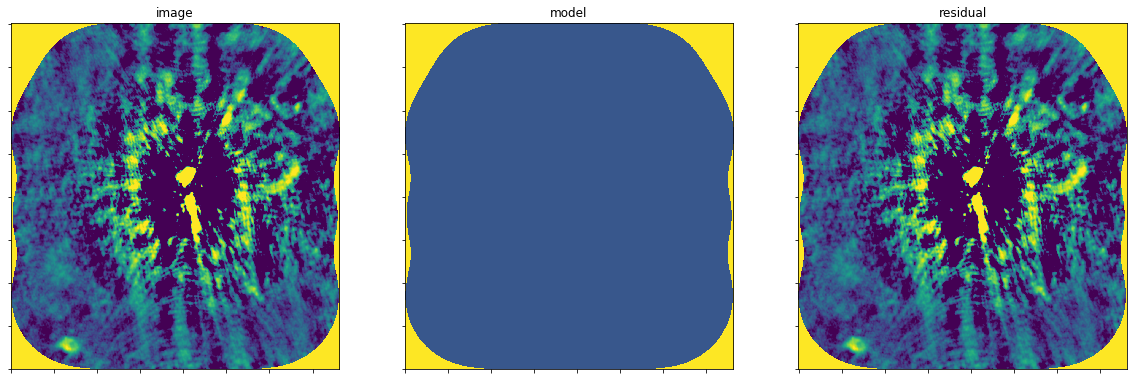

In [17]:
show(imgs_dirty_b6, vmin=-0.001, vmax=0.01)

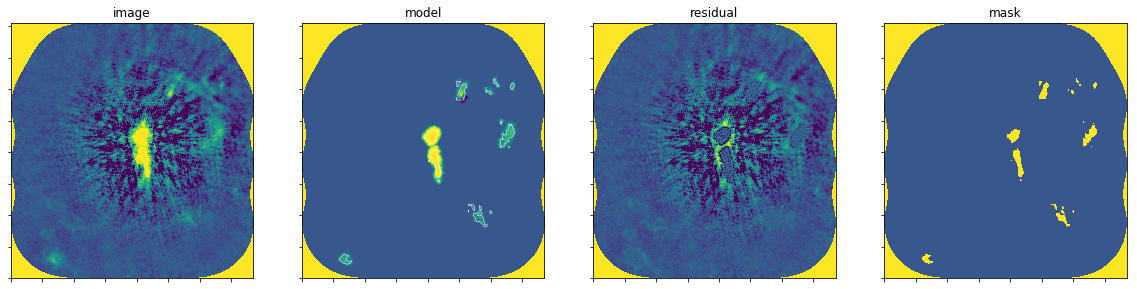

In [63]:
show(imgs_before_b6, vmin=-0.001, vmax=0.01)

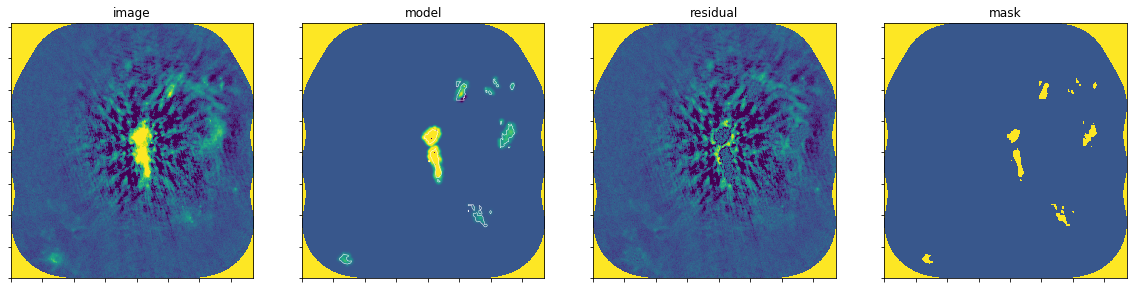

In [19]:
show(imgs_after_b6, vmin=-0.001, vmax=0.01)

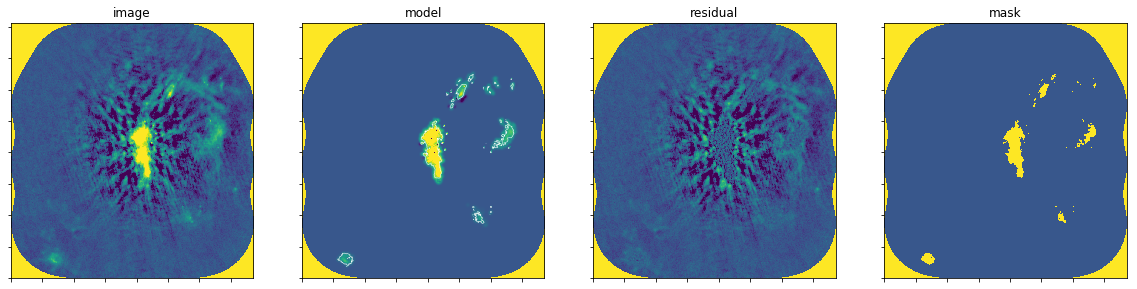

In [20]:
show(imgs_after2_b6, vmin=-0.001, vmax=0.01)

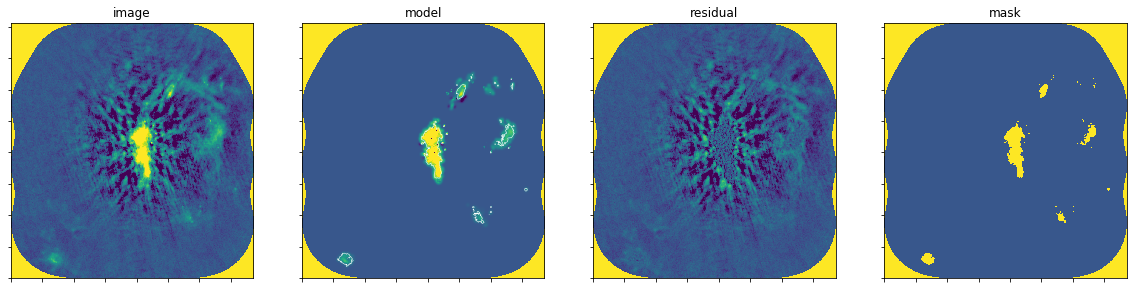

In [21]:
show(imgs_after3_b6, vmin=-0.001, vmax=0.01)

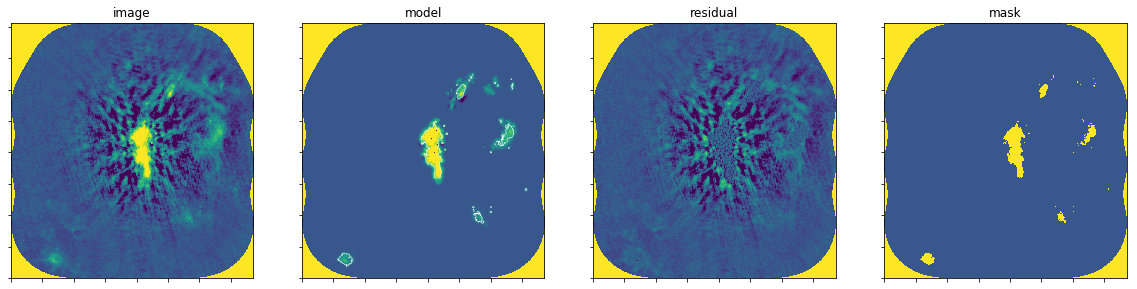

In [22]:
show(imgs_after4_b6, vmin=-0.001, vmax=0.01)

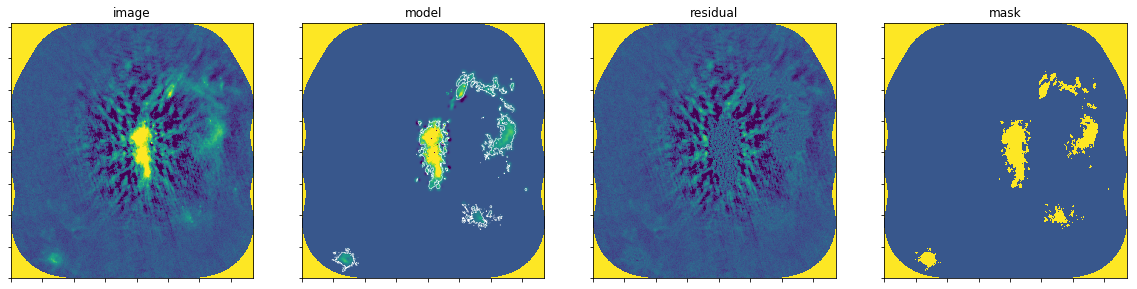

In [23]:
show(imgs_after5_b6, vmin=-0.001, vmax=0.01)

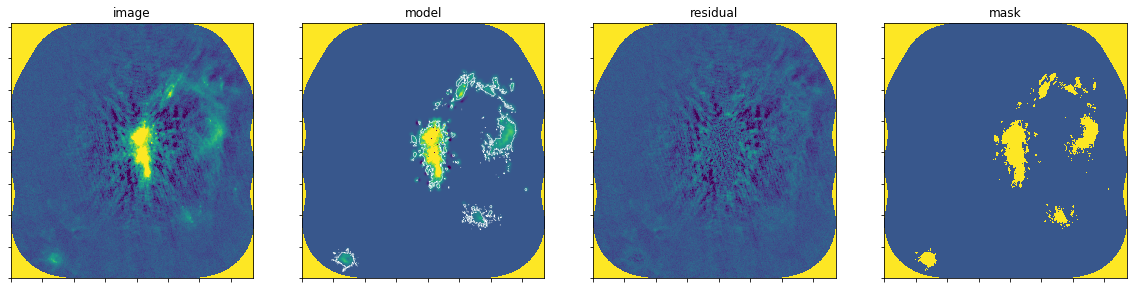

In [24]:
show(imgs_after6_b6, vmin=-0.001, vmax=0.01)

# Before vs. after 4x phase 2x amp self-cal

Text(0.5, 1.0, '6th iteration - 1st iteration')

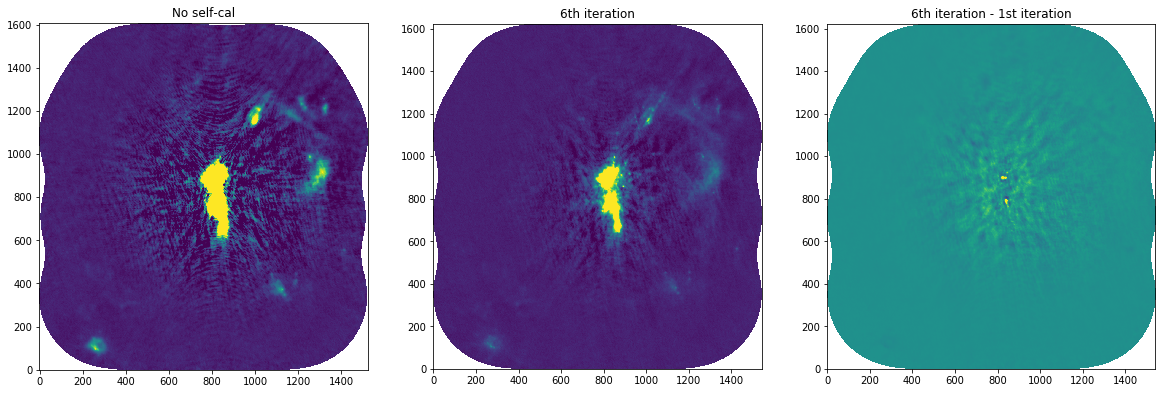

In [40]:
pl.subplot(1,3,1).imshow(imgs_before_b6['image'].value, origin='lower', vmin=-0.001, vmax=0.01)
pl.title("No self-cal")
pl.subplot(1,3,2).imshow(imgs_after6_b6['image'].value, origin='lower', vmin=-0.001, vmax=0.01)
pl.title("6th iteration")
pl.subplot(1,3,3).imshow(imgs_after6_b6['image'].value-imgs_after_b6['image'].value, origin='lower', vmin=-0.01, vmax=0.01)
pl.title("6th iteration - 1st iteration")

### Zoom-in panel discussion

These are the same images as shown above, but now zoomed in on the central regions with a higher peak intensity.

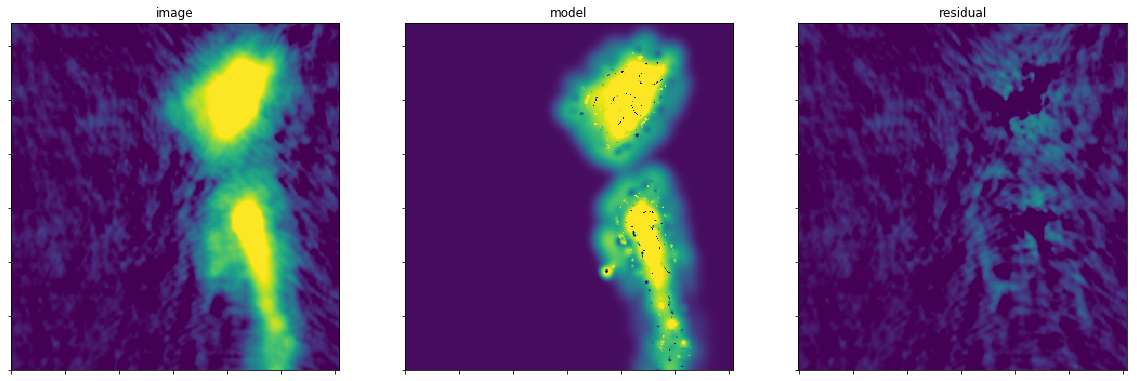

In [26]:
show(imgs_before_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

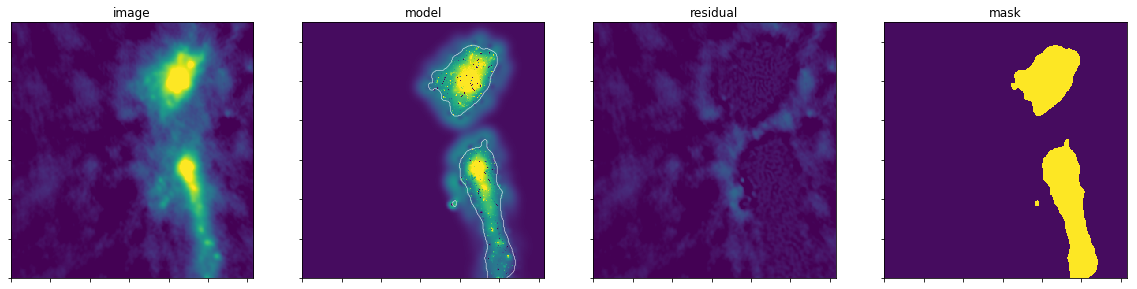

In [27]:
show(imgs_after_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

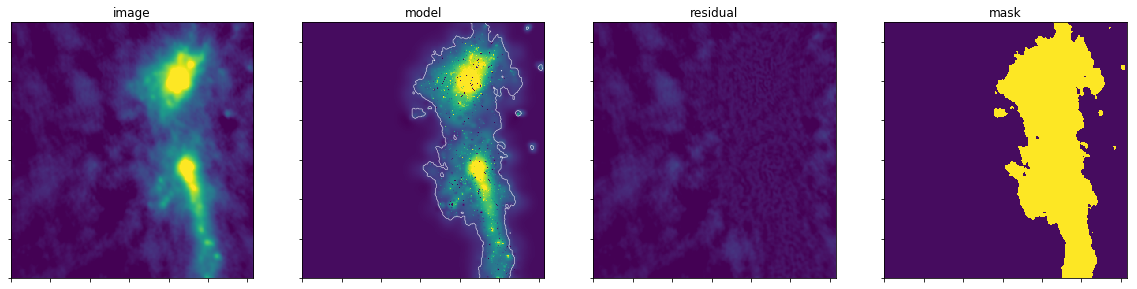

In [28]:
show(imgs_after2_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

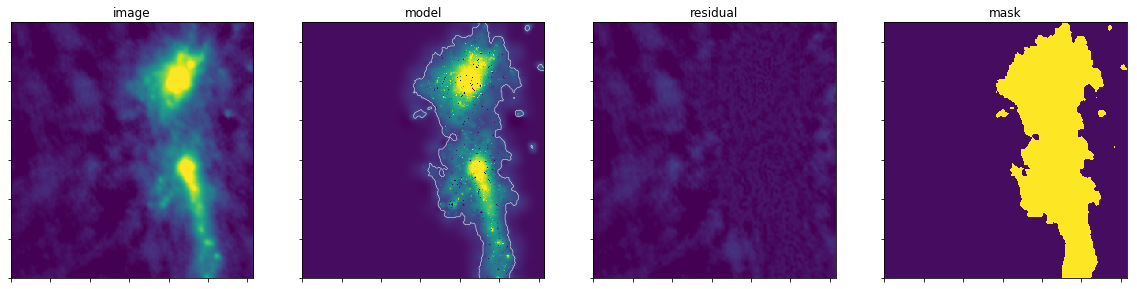

In [29]:
show(imgs_after3_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

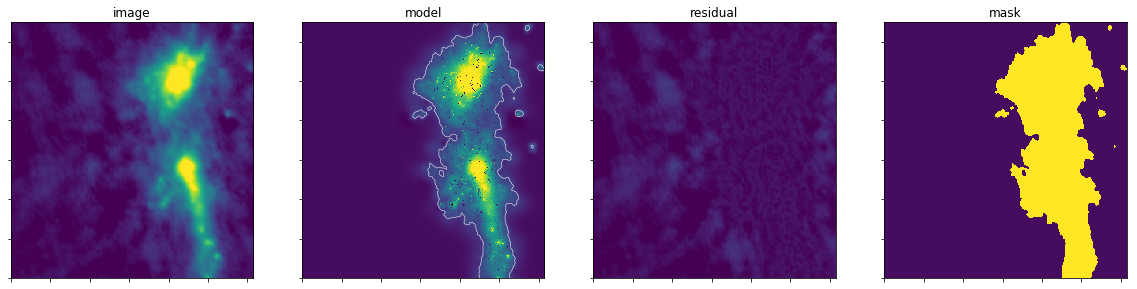

In [30]:
show(imgs_after4_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

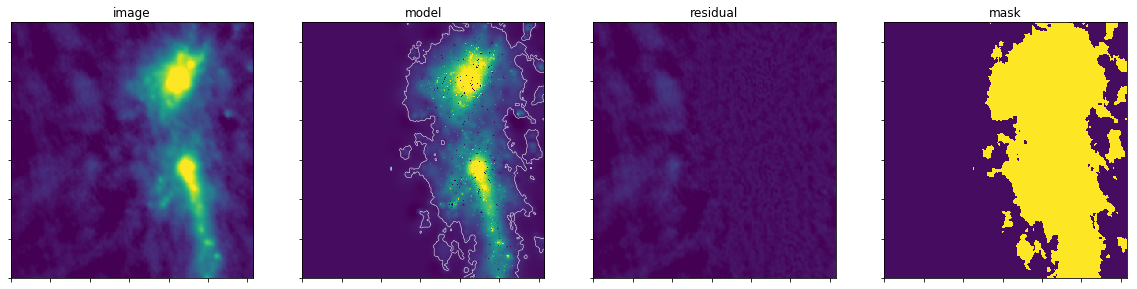

In [31]:
show(imgs_after5_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

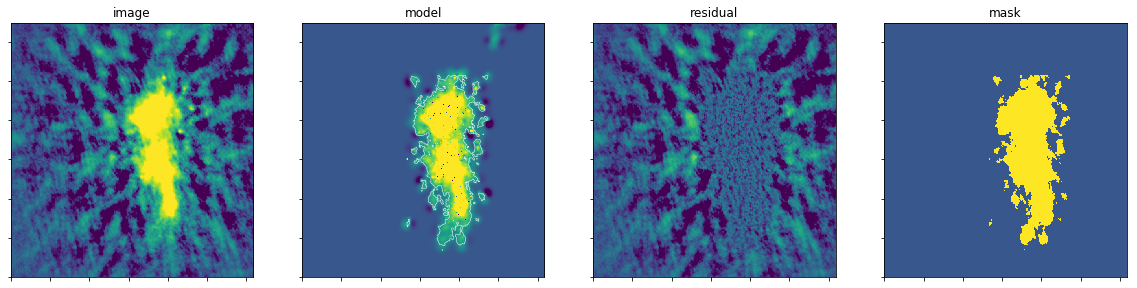

In [32]:
show(imgs_after5_b6, vmin=-0.001, vmax=0.01, zoom=0.4)

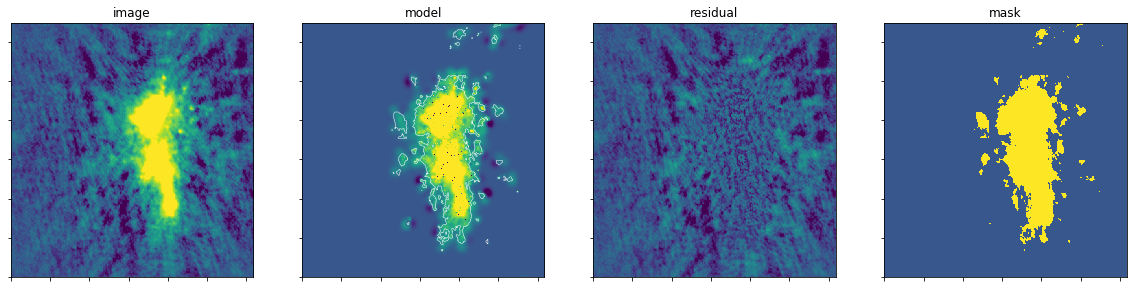

In [33]:
show(imgs_after6_b6, vmin=-0.001, vmax=0.01, zoom=0.4)

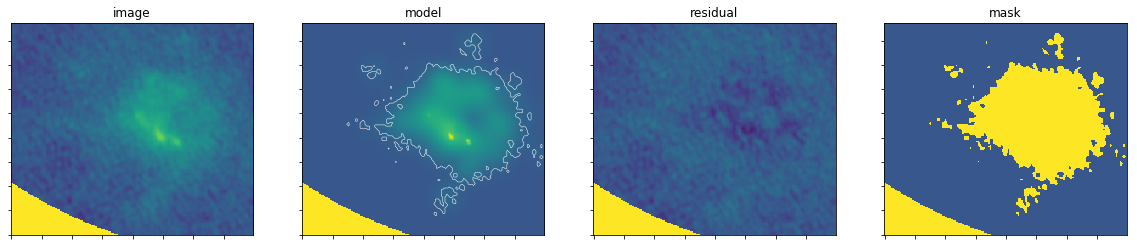

In [34]:
show(imgs_after6_b6, vmin=-0.001, vmax=0.01, zoom=[slice(25,200), slice(150,350)])

## Measurements of the peak-to-RMS ratio and RMS in each stage:

In [68]:
for imgs in (imgs_before_b6, imgs_after_b6, imgs_after2_b6, imgs_after3_b6, imgs_after4_b6, imgs_after5_b6, imgs_after6_b6):
    rms = np.nanstd(imgs['residual'].value*u.Jy/u.beam) # residual has bad header units
    peak = np.nanmax(imgs['image'].quantity)
    rms2 = stats.mad_std(imgs['image'].quantity, ignore_nan=True)
    beam = imgs['image'].beam
    print(f"peak/rms={peak/rms:6.1f}, peak/mad={peak/rms2:6.1f}, peak={peak:0.3f}, rms={rms.to(u.mJy/u.beam):0.5f}, mad={rms2.to(u.mJy/u.beam):0.5f},"
          f" beam={beam.major.value:0.2f}x{beam.minor.value:0.2f}")

peak/rms= 396.5, peak/mad= 904.2, peak=0.272 Jy / beam, rms=0.68553 mJy / beam, mad=0.30062 mJy / beam, beam=0.33x0.27
peak/rms= 733.8, peak/mad=1735.1, peak=0.449 Jy / beam, rms=0.61245 mJy / beam, mad=0.25902 mJy / beam, beam=0.35x0.28
peak/rms= 984.0, peak/mad=1897.5, peak=0.474 Jy / beam, rms=0.48125 mJy / beam, mad=0.24956 mJy / beam, beam=0.35x0.28
peak/rms= 986.2, peak/mad=1901.7, peak=0.473 Jy / beam, rms=0.47998 mJy / beam, mad=0.24893 mJy / beam, beam=0.35x0.28
peak/rms= 986.4, peak/mad=1904.9, peak=0.473 Jy / beam, rms=0.47972 mJy / beam, mad=0.24842 mJy / beam, beam=0.35x0.28
peak/rms=1121.5, peak/mad=1927.4, peak=0.474 Jy / beam, rms=0.42221 mJy / beam, mad=0.24568 mJy / beam, beam=0.35x0.28
peak/rms=1822.1, peak/mad=2390.9, peak=0.475 Jy / beam, rms=0.26068 mJy / beam, mad=0.19867 mJy / beam, beam=0.35x0.28


In [67]:
# shorter version
for imgs in (imgs_before_b6, imgs_after_b6, imgs_after2_b6, imgs_after3_b6, imgs_after4_b6, imgs_after5_b6, imgs_after6_b6):
    rms = np.nanstd(imgs['residual'].value*u.Jy/u.beam) # residual has bad header units
    peak = np.nanmax(imgs['image'].quantity)
    rms2 = stats.mad_std(imgs['image'].quantity, ignore_nan=True)
    beam = imgs['image'].beam
    print(f"peak/mad={peak/rms2:6.1f}, peak={peak:0.3f}, rms={rms.to(u.mJy/u.beam):0.5f}, mad={rms2.to(u.mJy/u.beam):0.5f},"
          f" beam={beam.major.value:0.2f}x{beam.minor.value:0.2f}")

peak/mad= 904.2, peak=0.272 Jy / beam, rms=0.68553 mJy / beam, mad=0.30062 mJy / beam, beam=0.33x0.27
peak/mad=1735.1, peak=0.449 Jy / beam, rms=0.61245 mJy / beam, mad=0.25902 mJy / beam, beam=0.35x0.28
peak/mad=1897.5, peak=0.474 Jy / beam, rms=0.48125 mJy / beam, mad=0.24956 mJy / beam, beam=0.35x0.28
peak/mad=1901.7, peak=0.473 Jy / beam, rms=0.47998 mJy / beam, mad=0.24893 mJy / beam, beam=0.35x0.28
peak/mad=1904.9, peak=0.473 Jy / beam, rms=0.47972 mJy / beam, mad=0.24842 mJy / beam, beam=0.35x0.28
peak/mad=1927.4, peak=0.474 Jy / beam, rms=0.42221 mJy / beam, mad=0.24568 mJy / beam, beam=0.35x0.28
peak/mad=2390.9, peak=0.475 Jy / beam, rms=0.26068 mJy / beam, mad=0.19867 mJy / beam, beam=0.35x0.28


The RMS is shrinking overall and the peak is rising, which is good.

For our records, we want to know what imaging parameters were used for these images:

In [36]:
import casatools
ia = casatools.image()
for suffix in ("","_selfcal1","_selfcal2","_selfcal3","_selfcal4","_selfcal5","_selfcal6"):
    ia.open('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0{0}.image.tt0'.format(suffix))
    print(suffix, ia.history())
    ia.close()

 ['niter: 10000', 'deconvolver: mtmfs', 'scales: [0, 3, 9, 27]', 'pblimit: 0.1', 'weighting: briggs', 'specmode: mfs', 'nterms: 2', 'threshold: 1mJy', 'robust: 0', 'gridder: mosaic']
_selfcal1 ['niter: 100000', 'deconvolver: mtmfs', 'scales: [0, 3, 9, 27]', 'pblimit: 0.1', 'weighting: briggs', 'specmode: mfs', 'nterms: 2', 'threshold: 1mJy', 'robust: 0', 'gridder: mosaic']
_selfcal2 ['niter: 100000', 'deconvolver: mtmfs', 'scales: [0, 3, 9, 27]', 'pblimit: 0.1', 'weighting: briggs', 'specmode: mfs', 'nterms: 2', 'threshold: 1mJy', 'robust: 0', 'gridder: mosaic']
_selfcal3 ['niter: 100000', 'deconvolver: mtmfs', 'scales: [0, 3, 9, 27]', 'pblimit: 0.1', 'weighting: briggs', 'specmode: mfs', 'nterms: 2', 'threshold: 1mJy', 'robust: 0', 'gridder: mosaic']
_selfcal4 ['niter: 100000', 'deconvolver: mtmfs', 'scales: [0, 3, 9, 27]', 'pblimit: 0.1', 'weighting: briggs', 'specmode: mfs', 'nterms: 2', 'threshold: 1mJy', 'robust: 0', 'gridder: mosaic']
_selfcal5 ['niter: 100000', 'deconvolver: mtm

# Final iteration, robust 2 and robust -2

In [41]:
imgs_after6_b6_r2, cubes_after6_b6_r2 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust2_selfcal7')

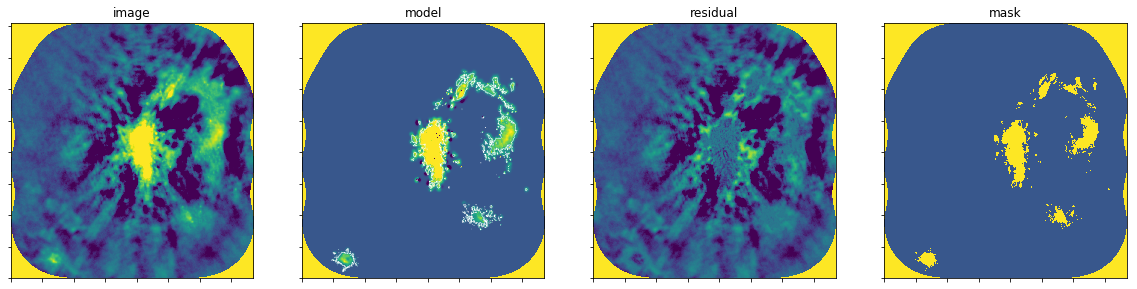

In [43]:
show(imgs_after6_b6_r2, vmin=-0.001, vmax=0.01)

In [44]:
imgs_after6_b6_rm2, cubes_after6_b6_rm2 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust-2_selfcal7')

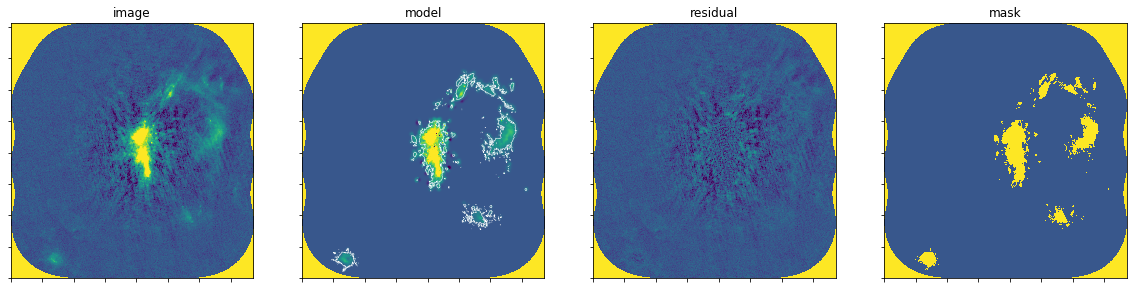

In [45]:
show(imgs_after6_b6_rm2, vmin=-0.001, vmax=0.01)

# What happens if we clean much, much deeper?

Is there any benefit to doing a super-deep clean and including _everything_ in the model?  (probably not)

In [46]:
imstoodeep, cubestoodeep = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_toodeep')

/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


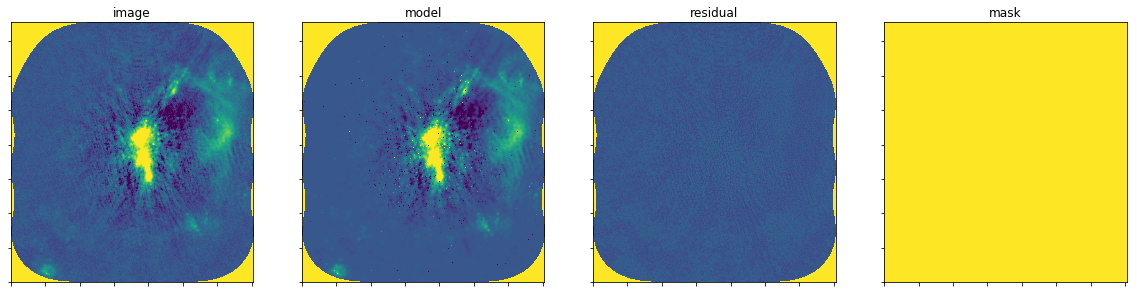

In [47]:
show(imstoodeep, vmin=-0.001, vmax=0.01)

Text(0.5, 1.0, 'Masked clean')

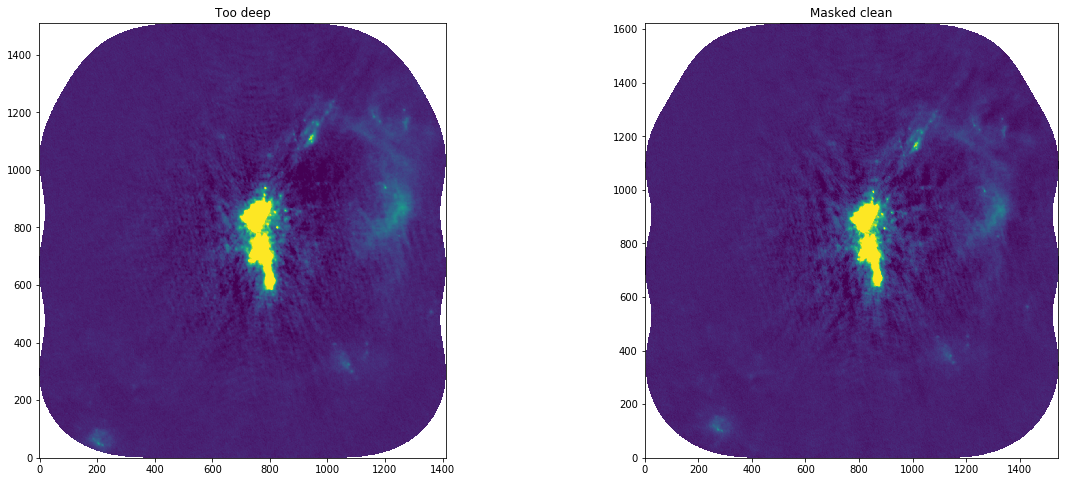

In [48]:
pl.subplot(1,2,1).imshow(imstoodeep['image'].value, origin='lower', vmin=-0.001, vmax=0.01); pl.title("Too deep")
pl.subplot(1,2,2).imshow(imgs_after6_b6['image'].value, origin='lower', vmin=-0.001, vmax=0.01); pl.title("Masked clean")

## Difference between (masked clean) - (too-deep, no-mask clean)

The too-deep clean recovers a lot more extended structure, so it _might_ be right for the extended HII region, but it also creates negative bowls.

/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/reproject/interpolation/core_celestial.py:26: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(array.dtype, np.float):


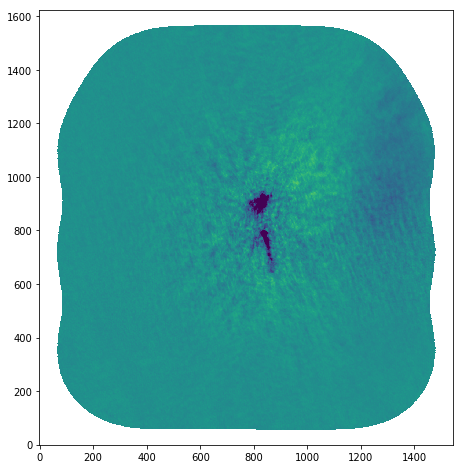

In [49]:
pl.gca().imshow(imgs_after6_b6['image'].value-imstoodeep['image'].reproject(imgs_after6_b6['image'].header).value, origin='lower', vmin=-0.003, vmax=0.003)